In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Se lee el archivo y se le asigna la variable df
df = pd.read_csv('datos.txt', skiprows=0, sep='\s+')
#La columna FECHA se cambia a una variable DAYTIME
df['FECHA'] = pd.to_datetime(df9.apply(lambda x: x['FECHA'], 1), dayfirst=True)

In [9]:
#Se le da a df forma de datos
df = pd.DataFrame(df)
#Seleccionamos las columnas que queremos numericas asignandoles un arreglo col
cols = ['PRECIP', 'EVAP', 'TMAX', 'TMIN']
#Cambiamos las columnas asignadas en col a valores numericos
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#Se muestra los tipos de variables para ver que todo sea correcto 
df.dtypes

FECHA     datetime64[ns]
PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
dtype: object

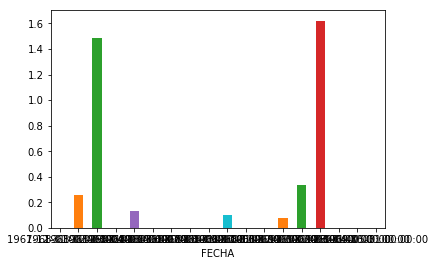

In [10]:
#Para obtener la gráfica de barras de la precipitación acumulada mensual, se ejecutan los siguientes comandos:
df2 = df.set_index('FECHA').resample('M')["PRECIP"].mean()
axx = df2.plot.bar(x='PRECIP', y='FECHA', rot=0)

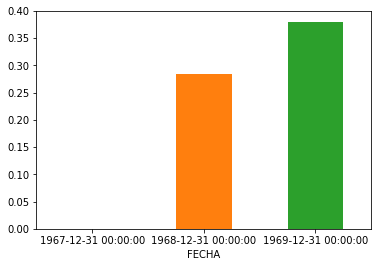

In [11]:
#Considaremos la precipitación acumulada a la suma de precipitaciones por año
df3 = df.set_index('FECHA').resample('Y')["PRECIP"].mean()
#Se muestra df3 que es una tabla de datos y con esto podemos ver cuales años han tenido mayor precipitación 
ax = df3.plot.bar(x='PRECIP', y='FECHA', rot=0)

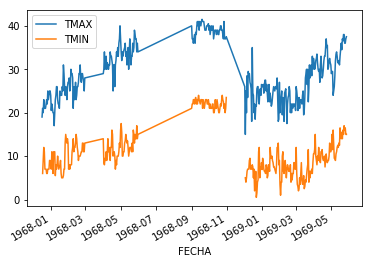

In [13]:
#La gráfica de evolución de la máximas y mínimas temperaturas se obtiene como sigue:
df.plot(x="FECHA",y=["TMAX","TMIN"])

In [14]:
#Se declara una tabla t1 y t2 que tenga el promedio de las temperaturas mensuales y anuales
t1 = df.set_index('FECHA').resample('M')["TMAX", "TMIN"].mean()
t2 = df.set_index('FECHA').resample('Y')["TMAX","TMIN"].mean()

#Transformamos las nuevas columnas en datos numéricos para poder generar una boxplot de ellos
cols2 = ['TMAX', 'TMIN']
t1[cols2] = t1[cols2].apply(pd.to_numeric, errors='coerce', axis=1)
t2[cols2] = t2[cols2].apply(pd.to_numeric, errors='coerce', axis=1)

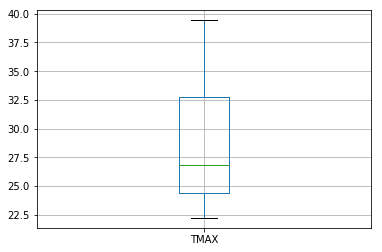

In [15]:
#Diagrama de caja de la temperatura máxima promedio por mes  
t1.boxplot(column=['TMAX'])

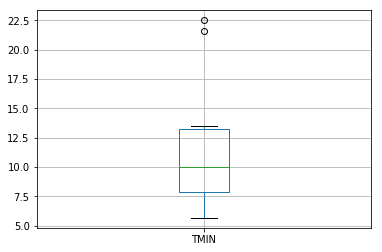

In [18]:
#Diagrama de caja de la temperatura mínima promedio por mes
t1.boxplot(column=['TMIN'])

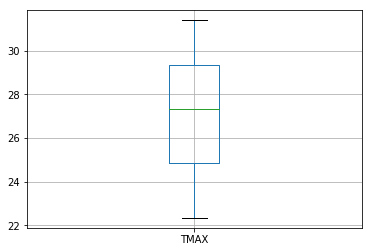

In [19]:
#Diagrama de caja de la temperatura máxima promedio por año
t2.boxplot(column=['TMAX'])

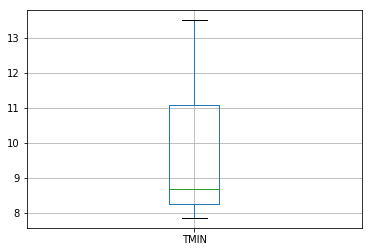

In [20]:
#Diagrama de caja de la temperatura mínimo promedio por año
t2.boxplot(column=['TMIN'])